In [1]:
import json

with open("/Users/kunje68/Desktop/Properties Explanations/anno1.json", "r") as handle:
    anno1 = json.load(handle)

In [2]:
with open("/Users/kunje68/Desktop/Properties Explanations/anno2.json", "r") as handle:
    anno2 = json.load(handle)

In [3]:
with open("/Users/kunje68/Desktop/Properties Explanations/anno3.json", "r") as handle:
    anno3 = json.load(handle)

In [4]:
questions = ['Does the output contain an explanation for the prediction?', 
'Would you give an explanation/justify your reasoning if you were asked this question by a friend?',
'If there is an explanation: Does the explanation list contributing factors?',
'If there is an explanation: Does the explanation include subjective or biased criteria?',
'If there is an explanation: Does the explanation include illustrative elements (e.g. examples)?',
'If there is an explanation: Is the explanation misleading (e.g. arguing for a label that is wrong)?']

In [6]:
# stats for all samples, per rater
def print_stats(questions, file): 
    for q in questions: 
        print(q)
        p = 0
        n = 0
        na = 0
        total = 0

        for i in range(len(file)):
            try: 
                if file[i]['data']['all_data'].endswith(q):
                    total += 1
                    if file[i]['annotations'][0]['result'][0]['value']['choices'][0] == "Yes":
                        p += 1
                    if file[i]['annotations'][0]['result'][0]['value']['choices'][0] == "No":
                        n += 1
                    if file[i]['annotations'][0]['result'][0]['value']['choices'][0] == "N/A":
                        na += 1
            except IndexError:
                na += 1

        print(p, n, na, total)
        
print_stats(questions, anno1)

Does the output contain an explanation for the prediction?
127 73 0 200
Would you give an explanation/justify your reasoning if you were asked this question by a friend?
149 51 0 200
If there is an explanation: Does the explanation refer to commonsense concepts that are taken as given?
97 30 73 200
If there is an explanation: Does the explanation list contributing factors?
61 66 73 200
If there is an explanation: Does the explanation include subjective or biased criteria?
8 119 73 200
If there is an explanation: Does the explanation include illustrative elements (e.g. examples)?
58 69 73 200
If there is an explanation: Is the explanation misleading (e.g. arguing for a label that is wrong)?
1 125 74 200


In [7]:
print_stats(questions, anno2)

Does the output contain an explanation for the prediction?
135 64 1 200
Would you give an explanation/justify your reasoning if you were asked this question by a friend?
126 74 0 200
If there is an explanation: Does the explanation refer to commonsense concepts that are taken as given?
3 132 65 200
If there is an explanation: Does the explanation list contributing factors?
98 31 71 200
If there is an explanation: Does the explanation include subjective or biased criteria?
7 128 65 200
If there is an explanation: Does the explanation include illustrative elements (e.g. examples)?
125 8 67 200
If there is an explanation: Is the explanation misleading (e.g. arguing for a label that is wrong)?
5 129 66 200


In [8]:
print_stats(questions, anno3)

Does the output contain an explanation for the prediction?
124 76 0 200
Would you give an explanation/justify your reasoning if you were asked this question by a friend?
100 100 0 200
If there is an explanation: Does the explanation refer to commonsense concepts that are taken as given?
113 11 76 200
If there is an explanation: Does the explanation list contributing factors?
79 45 76 200
If there is an explanation: Does the explanation include subjective or biased criteria?
3 121 76 200
If there is an explanation: Does the explanation include illustrative elements (e.g. examples)?
67 57 76 200
If there is an explanation: Is the explanation misleading (e.g. arguing for a label that is wrong)?
0 123 77 200


In [8]:
with open("/Users/kunje68/Downloads/expl_out.json", "r") as handle:
    parsed = json.load(handle)

In [6]:
# categories as determined in a manual annotation
# 'lists' and 'facts' were separate; we merged them because the content was very similar
cats = ['class', 'list', 'list', 'class', 'list', 'order', 'predict', 'math', 'list', 'list', 'list', 'class', 'list', 'fact', 'math', 'list', 'list', 'math', 'fact', 'list', 'class', 'list', 'class', 'code', 'math', 'list', 'list', 'class', 'list', 'math', 'class', 'list', 'math', 'code', 'list', 'list', 'code', 'class', 'list', 'list', 'class', 'list', 'list', 'list', 'code', 'list', 'list', 'class', 'list', 'list', 'class', 'class', 'class', 'list', 'list', 'list', 'list', 'class', 'class', 'code', 'list', 'math', 'class', 'list', 'class', 'math', 'math', 'code', 'code', 'list', 'list', 'code', 'order', 'class', 'list', 'planning', 'math', 'math', 'code', 'math', 'class', 'list', 'example', 'class', 'grammar', 'math', 'grammar', 'math', 'math', 'math', 'math', 'math', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'list', 'grammar', 'list', 'code', 'code', 'grammar', 'code', 'code', 'code', 'code', 'list', 'code', 'list', 'list', 'order', 'list', 'list', 'list', 'list', 'grammar', 'list', 'code', 'math', 'list', 'math', 'grammar', 'math', 'code', 'class', 'grammar', 'list', 'order', 'code', 'class', 'class', 'grammar', 'grammar', 'code', 'grammar', 'grammar', 'list', 'math', 'list', 'class', 'grammar', 'class', 'code', 'list', 'list', 'list', 'list', 'list', 'code', 'list', 'list', 'list', 'class', 'grammar', 'list', 'list', 'grammar', 'list', 'math', 'list', 'list', 'code', 'math', 'list', 'list', 'math', 'list', 'code', 'list', 'grammar', 'list', 'math', 'list', 'list', 'class', 'list', 'list', 'list', 'class', 'list', 'grammar', 'grammar', 'list', 'list', 'fact', 'list', 'list', 'code', 'code', 'grammar', 'code', 'list', 'class', 'list', 'list', 'grammar']

In [9]:
# map instructions to their annotated categories
annotated_cats = {}
for i in range(len(parsed)): 
    if cats[i] != 'fact':
        annotated_cats[parsed[i]['instruction']] = cats[i]
    else: annotated_cats[parsed[i]['instruction']] = 'list'
    
#print(annotated_cats)

In [10]:
# get category-specific stats, per rater
def print_cat_stats(questions, annotated_cats, file): 
    coll_lsts = {}
    for cat in ['math', 'code', 'class', 'list', 'grammar']: 
        coll_lsts[cat] = {}
    for q in questions: 
        #print(q)
        for cat in ['math', 'code', 'class', 'list', 'grammar']: 
            #print(cat)
            cat_lst = []
            total = 0
            for i in range(1400):
                try: 
                    if file[i]['data']['all_data'].endswith(q) and annotated_cats[file[i]['data']['instruction']] == cat:
                        total += 1
                        if file[i]['annotations'][0]['result'][0]['value']['choices'][0] == "Yes":
                            cat_lst.append(i)
                except IndexError:
                    pass
            coll_lsts[cat][q] = cat_lst
    return coll_lsts

d1 = print_cat_stats(questions, annotated_cats, anno1)
d2 = print_cat_stats(questions, annotated_cats, anno2)
d3 = print_cat_stats(questions, annotated_cats, anno3)

# number of samples where >=2 raters agree
for cat in ['math', 'code', 'class', 'list', 'grammar']: 
    for q in questions: 
        lst = d1[cat][q] + d2[cat][q] + d3[cat][q]  

        lst2 = list(set([x for x in lst if lst.count(x)>1]))
        print(cat, q, len(lst2))

math Does the output contain an explanation for the prediction? 19
math Would you give an explanation/justify your reasoning if you were asked this question by a friend? 11
math If there is an explanation: Does the explanation list contributing factors? 4
math If there is an explanation: Does the explanation include subjective or biased criteria? 0
math If there is an explanation: Does the explanation include illustrative elements (e.g. examples)? 3
math If there is an explanation: Is the explanation misleading (e.g. arguing for a label that is wrong)? 0
code Does the output contain an explanation for the prediction? 17
code Would you give an explanation/justify your reasoning if you were asked this question by a friend? 12
code If there is an explanation: Does the explanation list contributing factors? 3
code If there is an explanation: Does the explanation include subjective or biased criteria? 0
code If there is an explanation: Does the explanation include illustrative elements (e.g

In [14]:
# get summary over all categories 
def print_all_stats(questions, file): 
    coll_lsts = {}
    for q in questions: 
        cat_lst = []
        total = 0
        for i in range(1400):
            try: 
                if file[i]['data']['all_data'].endswith(q):
                    total += 1
                    if file[i]['annotations'][0]['result'][0]['value']['choices'][0] == "Yes":
                        cat_lst.append(i)
            except IndexError:
                pass
            coll_lsts[q] = cat_lst
    return coll_lsts

d1 = print_all_stats(questions, anno1)
d2 = print_all_stats(questions, anno2)
d3 = print_all_stats(questions, anno3)

# number of samples where >=2 raters agree
for q in questions: 
    lst = d1[q] + d2[q] + d3[q]  

    lst2 = list(set([x for x in lst if lst.count(x)>1]))
    print(cat, q, len(lst2))

all Does the output contain an explanation for the prediction? 137
all Would you give an explanation/justify your reasoning if you were asked this question by a friend? 125
all If there is an explanation: Does the explanation list contributing factors? 79
all If there is an explanation: Does the explanation include subjective or biased criteria? 1
all If there is an explanation: Does the explanation include illustrative elements (e.g. examples)? 86
all If there is an explanation: Is the explanation misleading (e.g. arguing for a label that is wrong)? 0


In [13]:
# correlation between q1 and q2, per rater.
from sklearn.metrics import matthews_corrcoef

def correlation(file): 
    human = []
    llm = []
    for i in range(len(file)):
        if file[i]['data']['all_data'].endswith('Does the output contain an explanation for the prediction?'):
            if file[i]['annotations'][0]['result'][0]['value']['choices'][0] == "Yes":
                llm.append(1)
            else:
                llm.append(0)
        if file[i]['data']['all_data'].endswith('Would you give an explanation/justify your reasoning if you were asked this question by a friend?'):
            if file[i]['annotations'][0]['result'][0]['value']['choices'][0] == "Yes":
                human.append(1)
            else:
                human.append(0)

    print(matthews_corrcoef(llm, human))
correlation(anno1)
correlation(anno2)
correlation(anno3)

0.5810469726705211
0.48533300365523596
0.7004727969157798


In [14]:
# avg token number per category
def cat_lens(annotated_cats, file): 
    all_avg = 0
    all_total = 0
    for c in ['math', 'code', 'class', 'list', 'grammar']: 
        print(c)
        avg = 0
        total = 0
        for i in range(1400):
            if annotated_cats[file[i]['data']['instruction']] == c:
                avg += len(file[i]['data']['output'].split())
                total += 1
        print(avg/total)
        all_avg += avg
        all_total += total
        
    print('all cats')
    print(all_avg/all_total)
cat_lens(annotated_cats, anno1)

math
76.88461538461539
code
109.77777777777777
class
30.20689655172414
list
168.08695652173913
grammar
24.263157894736842
all cats
112.76683937823834


In [15]:
# get krippendorff's alpha and pairwise cohen kappa
from sklearn.metrics import cohen_kappa_score
import krippendorff_alpha

def kappa_score(file1,file2,file3,questions): 
    for q in questions:
        print(q)
        l1 = []
        l2 = []
        l3 = []
        for i in range(len(file1)):
            try: 
                if (file1[i]['annotations'][0]['result'][0]['value']['choices'][0] != "N/A") and (file2[i]['annotations'][0]['result'][0]['value']['choices'][0] != "N/A") and  (file3[i]['annotations'][0]['result'][0]['value']['choices'][0] != "N/A"):
                    if file1[i]['data']['all_data'].endswith(q):
                        if file1[i]['annotations'][0]['result'][0]['value']['choices'][0] == "Yes":
                            l1.append(1)
                        else:
                            l1.append(0)
                    if file2[i]['data']['all_data'].endswith(q):
                        if file2[i]['annotations'][0]['result'][0]['value']['choices'][0] == "Yes":
                            l2.append(1)
                        else:
                            l2.append(0)
                    if file3[i]['data']['all_data'].endswith(q):
                        if file3[i]['annotations'][0]['result'][0]['value']['choices'][0] == "Yes":
                            l3.append(1)
                        else:
                            l3.append(0)
            except IndexError:
                pass

        print(cohen_kappa_score(l1, l2))
        print(cohen_kappa_score(l1, l3))
        print(cohen_kappa_score(l2, l3))
        print(krippendorff_alpha.krippendorff_alpha([l1, l2, l3]))
kappa_score(anno1, anno2, anno3, questions)

Does the output contain an explanation for the prediction?
0.7324069923800987
0.6344283553058137
0.758548422678138
0.7079147267826513
Would you give an explanation/justify your reasoning if you were asked this question by a friend?
0.32385972954389186
0.27
0.56
0.37526518518518515
If there is an explanation: Does the explanation refer to commonsense concepts that are taken as given?
0.020615932807330317
0.33978234582829503
-0.015539689206216067
-0.21747459603531571
If there is an explanation: Does the explanation list contributing factors?
0.4166500697072295
0.39904799682665615
0.47848537005163516
0.41631233088519526
If there is an explanation: Does the explanation include subjective or biased criteria?
0.16129032258064513
-0.03409090909090917
-0.040000000000000036
0.03987651144841775
If there is an explanation: Does the explanation include illustrative elements (e.g. examples)?
0.09530928798355454
0.3016949152542373
0.11892343000208627
0.10000942595909135
If there is an explanation: I

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


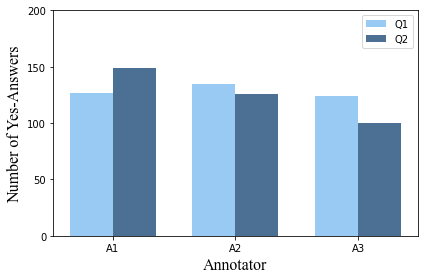

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

group1 = [1, 2, 3]
data1 = [127, 135, 124]

group2 = [1, 2, 3]
data2 = [149, 126, 100]

bar_width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))  

bar1 = [x - bar_width/2 for x in group1]
bar2 = [x + bar_width/2 for x in group2]

rects1 = ax.bar(bar1, data1, bar_width, label='Q1', color='#6DB4EE', alpha=0.7)
rects2 = ax.bar(bar2, data2, bar_width, label='Q2', color= '#003366', alpha=0.7)

ax.set_xlabel('Annotator', fontname='Times New Roman', fontsize=16)
ax.set_ylabel('Number of Yes-Answers', fontname='Times New Roman', fontsize=16)
ax.set_yticks([0,50,100,150,200])
ax.set_xticks(group1)  
ax.set_xticklabels(['A1', 'A2', 'A3'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  
#ax.set_xticklabels(group1, fontname='Times New Roman', fontsize=10)
ax.legend()

plt.tight_layout()
#plt.savefig('histogram_q12.pdf', format='pdf')

plt.show()

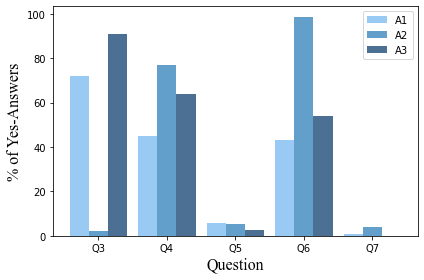

In [17]:
group1 = [1,2,3,4,5]
group2 = [1,2,3,4,5]
group3 = [1,2,3,4,5]

data1 = [100*97/135, 100*61/135, 100*8/135, 100*58/135, 100*1/135]
data2 = [100*3/127, 100*98/127, 100*7/127, 100*125/127, 100*5/127]
data3 = [100*113/124, 100*79/124, 100*3/124, 100*67/124, 100*0/124]

bar_width = 0.28
fig, ax = plt.subplots(figsize=(6, 4))  

bar1 = [x - bar_width for x in group1]
bar2 = [x for x in group2]
bar3 = [x + bar_width for x in group3]

rects1 = ax.bar(bar1, data1, bar_width, label='A1', color='#6DB4EE', alpha=0.7)
rects2 = ax.bar(bar2, data2, bar_width, label='A2', color='#1F77B4', alpha=0.7)
rects3 = ax.bar(bar3, data3, bar_width, label='A3', color='#003366', alpha=0.7)

ax.set_xlabel('Question', fontname='Times New Roman', fontsize=16)
ax.set_ylabel('% of Yes-Answers', fontname='Times New Roman', fontsize=16)
#ax.set_title('Histogram with Two Groups of Bars', fontname='Times New Roman', fontsize=14)
ax.set_xticks(group1)  
ax.set_xticklabels(['Q3', 'Q4', 'Q5', 'Q6', 'Q7'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  
#ax.set_xticklabels(group1, fontname='Times New Roman', fontsize=10)
ax.legend()

plt.tight_layout()
#plt.savefig('histogram_properties.pdf', format='pdf')

plt.show()

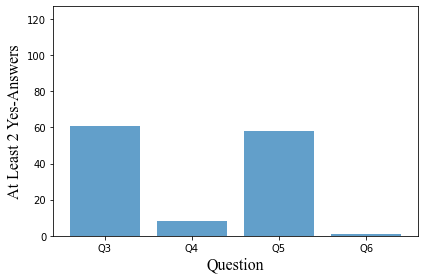

In [18]:
group1 = [0,1,2,3]
data1 = [61, 8, 58, 1]

bar_width = 0.8
fig, ax = plt.subplots(figsize=(6, 4))  
bar1 = [x for x in group1]
rects1 = ax.bar(bar1, data1, bar_width, label='A1', color='#1F77B4', alpha=0.7)

ax.set_xlabel('Question', fontname='Times New Roman', fontsize=16)
ax.set_ylabel('At Least 2 Yes-Answers', fontname='Times New Roman', fontsize=16)
ax.set_ylim([0, 127])

ax.set_xticks(group1)  
ax.set_xticklabels(['Q3', 'Q4', 'Q5', 'Q6'])

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
# plt.savefig('histogram_properties.pdf', format='pdf')

plt.show()